In [1]:
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
from datetime import timedelta, date
import statistics

In [2]:
def findDay(date):
    born = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
    return born

In [3]:
# Function to convert string to datetime
def convert(date_time):
    format = '%d-%b-%Y'  # The format
    datetime_str = datetime.datetime.strptime(date_time, format)

    return datetime_str

In [4]:
def average_price(price_list_week):
      non_zero_prices = []
      if not all(elem == 0 for elem in price_list_week):
        for i in price_list_week:
          if i!=0:
            non_zero_prices.append(i)
        average = statistics.mean(non_zero_prices)
      else:
        average = 0
      return average

In [5]:
def daterange(date1, date2):
      for n in range(int ((date2 - date1).days)+1):
          yield date1 + timedelta(n)

In [ ]:
def data_analysis(dataset):
    from google.colab import drive
    drive.mount('/content/drive')

    data = pd.read_csv(dataset)
    data_new = data.drop(data[data['Variety'] == 'Pine Apple'].index, inplace=False)
    data_new.drop(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety', 'Grade', 'Max Price (Rs./Quintal)', 'Min Price (Rs./Quintal)'], axis=1)

    list_Date = data_new['Price Date'].tolist()[::-1]
    list_Price = data_new['Modal Price (Rs./Quintal)'].tolist()[::-1]

    list_Date_new = []
    list_day = []
    for i in list_Date:
        k = i[:-2] + '20' + i[-2:]
        # print(k)
        changed_date = str(convert(k)).split()[0]
        day = findDay(changed_date)
        list_Date_new.append(changed_date)
        list_day.append(day)

    year = int('20' + list_Date[0][-2:])
    print(year)

    with_price_date_list = list(zip(list_Date_new, list_Price, list_day))
    New_Data = pd.DataFrame(with_price_date_list, columns=['Date', 'Price', 'Day'])

    Dict_date_price = {list_Date_new[i]: list_Price[i] for i in range(len(list_Date))}
    print(Dict_date_price)

    dates_of_given_year = []
    start_dt = date(year, 1, 1)
    end_dt = date(year, 12, 31)
    for dt in daterange(start_dt, end_dt):
        d = dt.strftime("%Y-%m-%d")
        dates_of_given_year.append(d)

    dates_not_Data_new = []
    price_for_dates_not_Data_new = []
    day_for_dates_not_Data_new = []
    total_date_price_set=[]
    for i in dates_of_given_year:
      if i in list_Date_new:
        set_of_a_date = [i,Dict_date_price[i]]
      else:
        set_of_a_date = [i,0]
      total_date_price_set.append(set_of_a_date)

    New_Data_total_Date_Price = pd.DataFrame(total_date_price_set, columns = ['Date', 'Price'])
    Date_of_New_Data_total = New_Data_total_Date_Price ['Date'].tolist()
    Price_of_New_Data_total = New_Data_total_Date_Price ['Price'].tolist()

    list_day=[]
    for i in Date_of_New_Data_total:
      day = findDay(i)
      list_day.append(day)

    New_Data_total_Date_Price_day_list  = list (zip(Date_of_New_Data_total,Price_of_New_Data_total, list_day))
    New_Data_total_Date_Price_day = pd.DataFrame(New_Data_total_Date_Price_day_list, columns = ['Date', 'Price', 'Day'])
    New_Data_total_Date_Price_day.head(25)


####WEEKLY ANALYSIS#####
    c = New_Data_total_Date_Price_day["Day"].tolist()
    avg=[]
    week=[-1]
    for i in range(1,len(c)):
      if (c[i-1]>c[i]):
        week.append(i-1)   

    k=New_Data_total_Date_Price_day["Price"].tolist()

    average_prices=[]
    week_no=[]
    try:
      for i in range(0,len(week)):
        week_no.append('W'+str(i))
        list_of_prices_for_a_week = k[(week[i]+1):(week[i+1]+1)]
        average_price_for_a_week = average_price(list_of_prices_for_a_week)
        average_prices.append(average_price_for_a_week)
        print("list of price for {} : ".format('W'+str(i)),list_of_prices_for_a_week," Average  ",average_price_for_a_week)
    except Exception as e:
      pass

    week_no.pop()
    
    print("\n")
    print("\n")

    new_lst  = list (zip(week_no, average_prices))
    New_Dataframe = pd.DataFrame(new_lst, columns = ['Week_No', 'Price'])

    

    New_Dataframe.plot("Week_No","Price")
    plt.title(year)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2012
{'2012-01-02': 1900, '2012-01-03': 1900, '2012-01-25': 1750, '2012-01-28': 2200, '2012-01-30': 1700, '2012-01-31': 1700, '2012-02-01': 1650, '2012-02-02': 1650, '2012-02-03': 1650, '2012-02-04': 1550, '2012-02-06': 1550, '2012-02-07': 1600, '2012-02-08': 1450, '2012-02-09': 1700, '2012-02-10': 1650, '2012-02-13': 1750, '2012-02-14': 1650, '2012-02-15': 1650, '2012-02-16': 1600, '2012-02-17': 1650, '2012-02-18': 1700, '2012-02-21': 1550, '2012-02-23': 1550, '2012-02-24': 1450, '2012-02-25': 1400, '2012-02-29': 1600, '2012-03-01': 1600, '2012-03-02': 1400, '2012-03-03': 1400, '2012-03-05': 1700, '2012-03-06': 1750, '2012-03-07': 1600, '2012-03-08': 1900, '2012-03-09': 1900, '2012-03-12': 1850, '2012-03-13': 1800, '2012-03-14': 1850, '2012-03-15': 2250, '2012-03-16': 2250, '2012-03-17': 2450, '2012-03-19': 2400, '2012-03-20': 2450, '2012-03-21': 2450, '2012

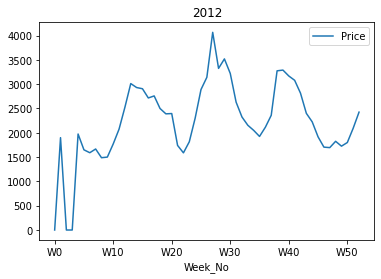

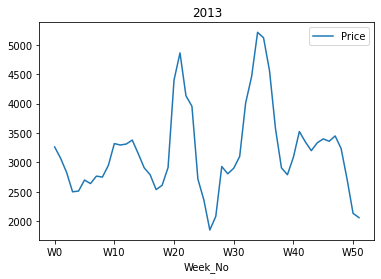

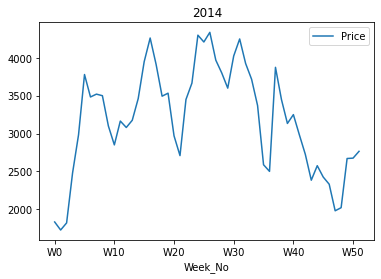

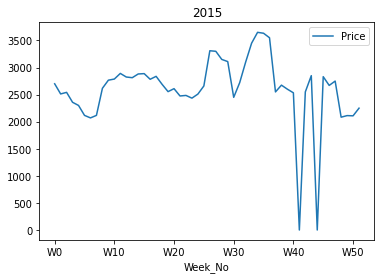

In [ ]:
data_analysis_list = ["/content/drive/MyDrive/Senzmate/CROP_planning/Agmarknet_Price_Report_2012_new.csv", "/content/drive/MyDrive/Senzmate/CROP_planning/Agmarknet_Price_Report_2013_new.csv", "/content/drive/MyDrive/Senzmate/CROP_planning/Agmarknet_Price_Report_2014_new.csv", "/content/drive/MyDrive/Senzmate/CROP_planning/Agmarknet_Price_Report_2015_new.csv"]

for i in data_analysis_list:
  data = data_analysis(i)